<a href="https://colab.research.google.com/github/my-opencode/colaboratory-stable-diffusion/blob/main/StableDiffusionXL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanilla Stable Diffusion Pipeline (XL)

### 1. Install dependencies

In [18]:
%pip install diffusers transformers Pillow accelerate scipy safetensors ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 789.4 kB/s eta 0:00:00


### 2. Import libraries

In [24]:
import torch
from IPython.display import display
from PIL import Image
from diffusers import StableDiffusionXLPipeline

### 3. Initiate Pipeline XL with pretrained model & send to CUDA

possible checkpoints

- "stabilityai/stable-diffusion-xl-base-1.0"
- "stablediffusionapi/albedobase-xl-20"

In [34]:
pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stablediffusionapi/albedobase-xl-20",
    torch_dtype=torch.float16
    )
pipeline = pipeline.to('cuda')

model_index.json:   0%|          | 0.00/676 [00:00<?, ?B/s]

text_encoder_2/model.safetensors not found


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

### 4. Render & displai image

  0%|          | 0/50 [00:00<?, ?it/s]

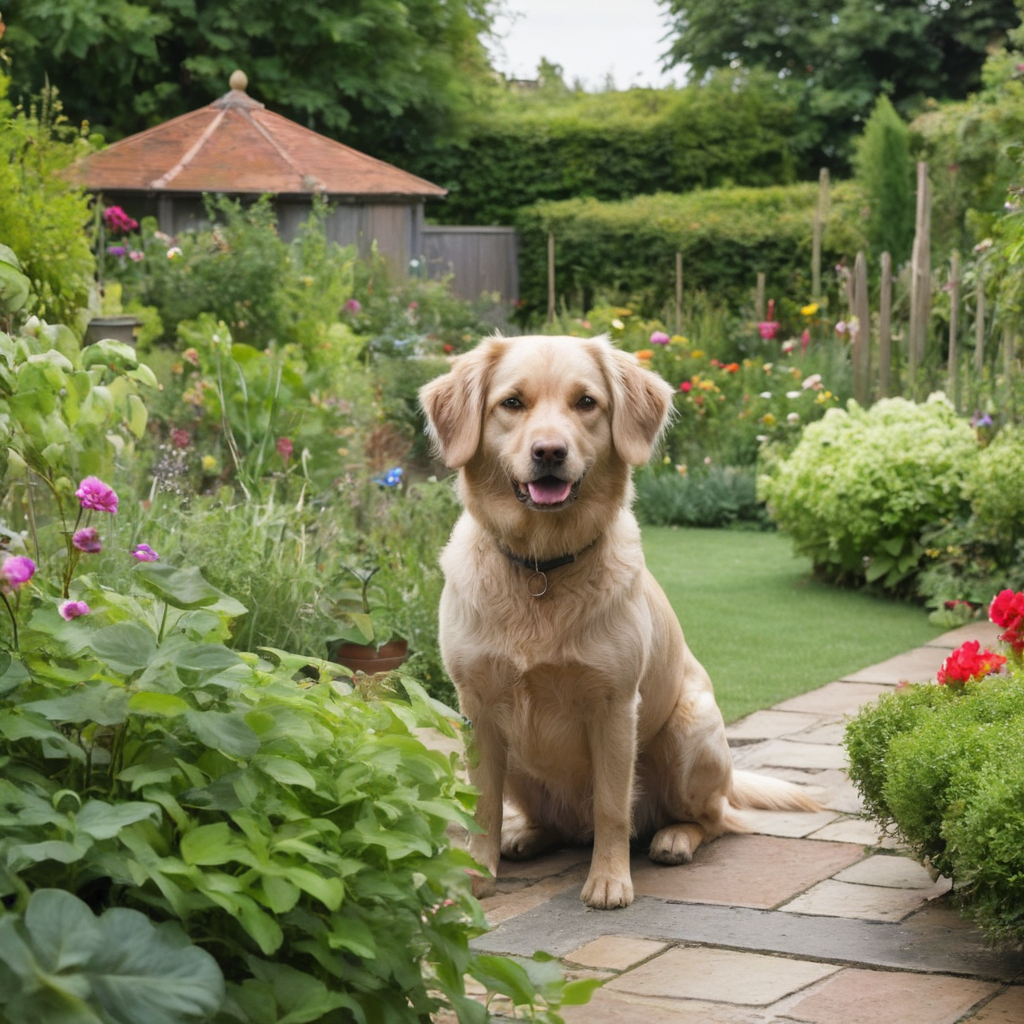

In [35]:
prompt = "a dog in the garden"
image = pipeline(
    prompt
    ).images[0]
display(image)

### 5. Advanced controls

  0%|          | 0/27 [00:00<?, ?it/s]

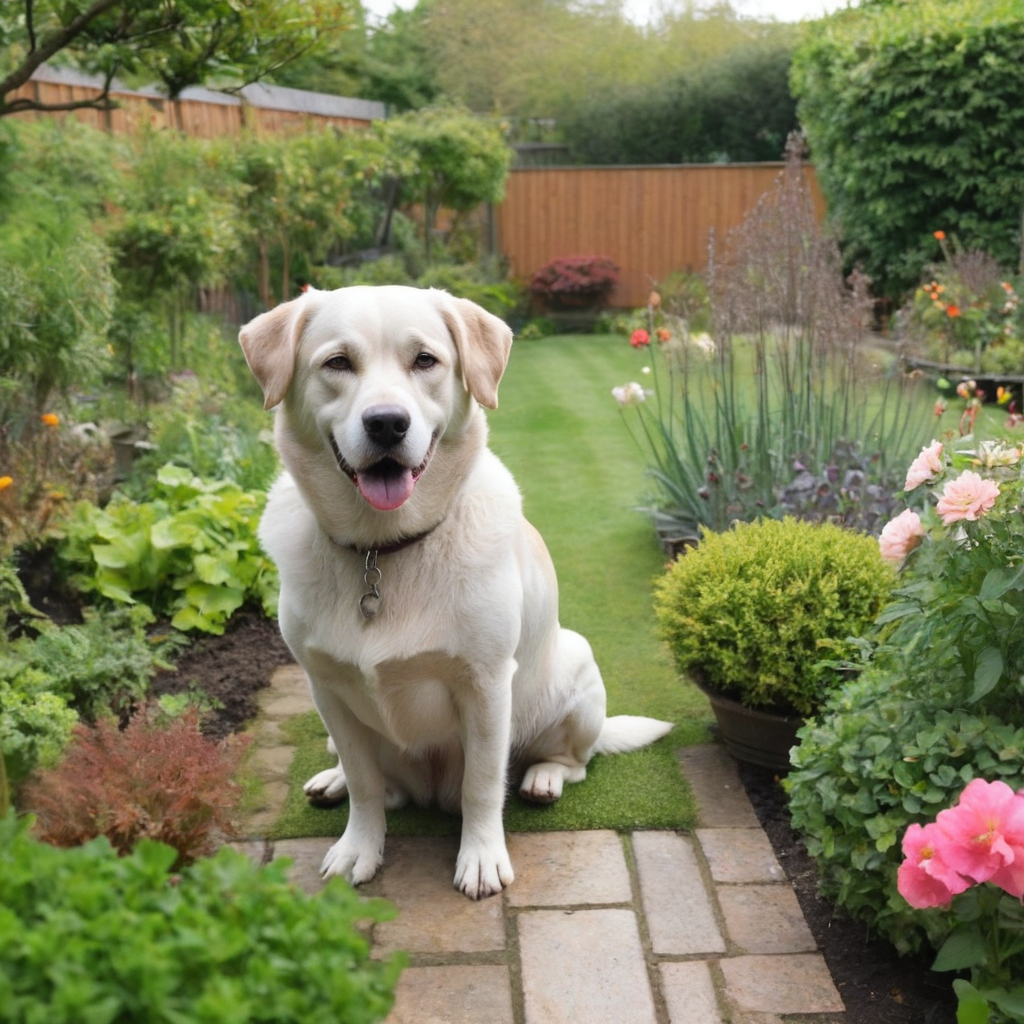

In [36]:
generator = torch.Generator("cuda").manual_seed(1234567890)
prompt = "a dog in the garden"
image = pipeline(
    prompt,
    num_inference_steps=27,
    guidance_scale=7.5,
    height=1024,
    width=1024,
    generator=generator
    ).images[0]
display(image)